In [30]:
import helper
import pathlib
import importlib
import ica_module
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nilearn.image import load_img
from nilearn.image import iter_img
from nilearn.image import index_img
from nilearn.image import concat_imgs
from nilearn.plotting import plot_prob_atlas
from nilearn.plotting import plot_stat_map, show, plot_anat

In [31]:
Original_DBMs = load_img("/data/origami/niusha/input/DBM_data.nii")
data = Original_DBMs.get_fdata()

In [85]:
importlib.reload(helper)

<module 'helper' from '/data/origami/niusha/code/local-experiment/helper.py'>

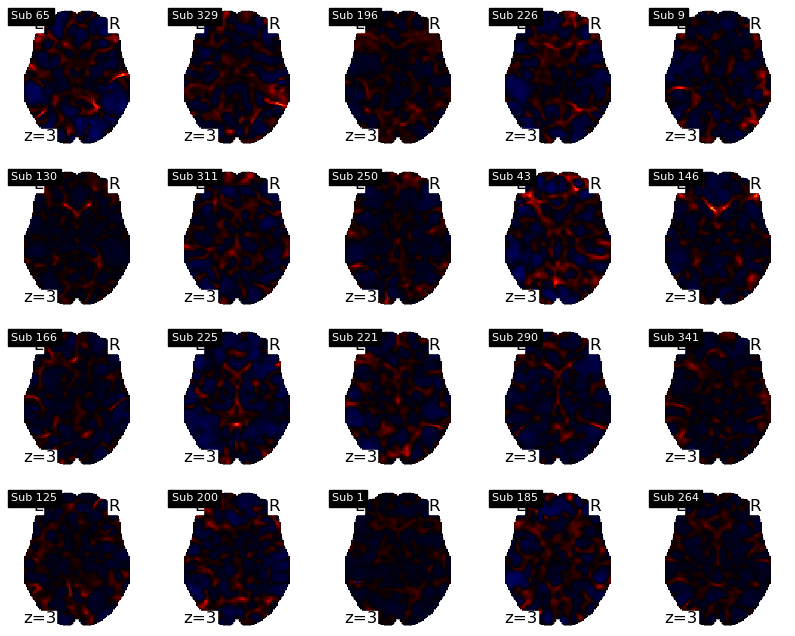

In [71]:
helper.random_plotter(Original_DBMs,z_slice=[3])

     ======== data type ======== 
 <class 'numpy.memmap'>
     ======== Maximum ========
Overall Maximum: 30.39


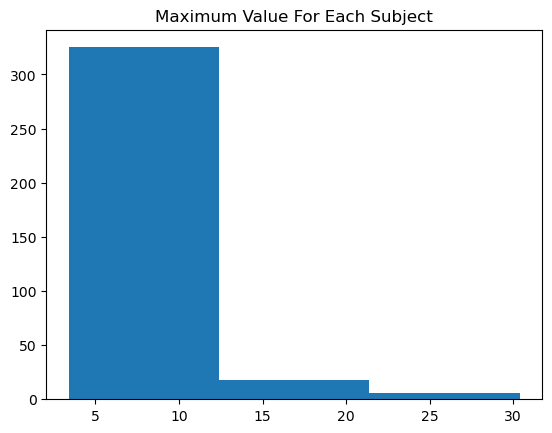

     ======== Mean ========
Overall Mean: -0.00


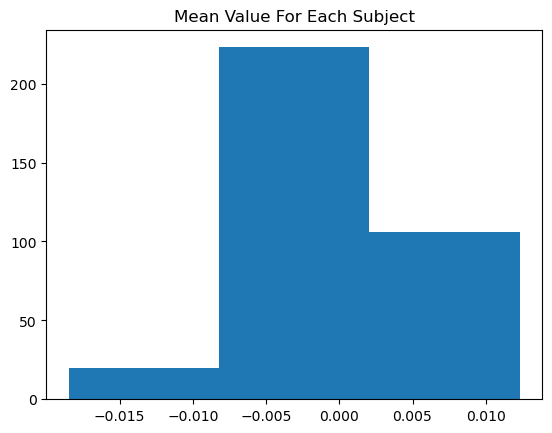

     ======== Minimum ========
Overall Minimum: -11.39


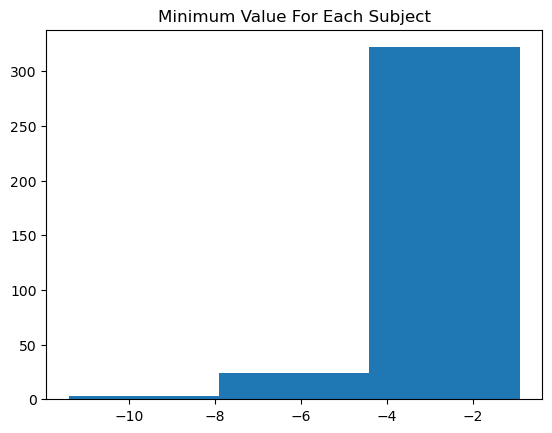

In [59]:
helper.image_report(Original_DBMs)

In [77]:
ICs_whole_original = load_img("/data/origami/niusha/code/local-experiment/io/whole_original_data/ICAs/ICAs_whole_original.nii.gz")

In [87]:
helper.plot_ICA_components(imgs=ICs_whole_original)

In [5]:
# ica_module.plot_ICA_components(ICs_whole_original)

In [5]:
ICs_data = ICs_whole_original.get_fdata()

In [6]:
from nilearn.maskers import NiftiMasker
# masker = NiftiMasker(mask_img=index_img(ICs_whole_original,1))
# masked_subject = masker.transform_single_imgs(imgs=Original_DBMs)

In [61]:
from nilearn.image import threshold_img, binarize_img
thr_IC0 = threshold_img(index_img(ICs_whole_original,0), threshold="80%")

In [62]:
sub1 = index_img(Original_DBMs,1)

In [63]:
sub1_data = sub1.get_fdata()
thr_IC0_data = thr_IC0.get_fdata()

In [7]:
data = Original_DBMs.get_fdata()

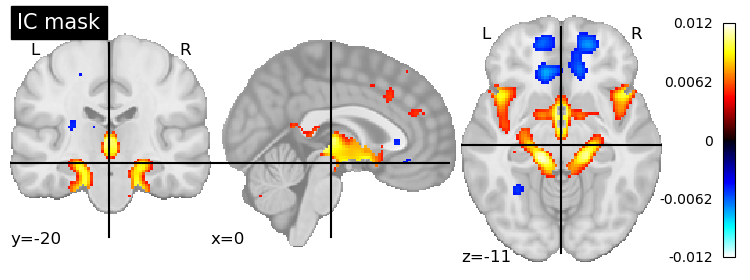

In [64]:
plot_stat_map(thr_IC0, title="IC mask")

In [73]:
nw_IC_0th_repeat = np.repeat(thr_IC0_data,349,axis=2)

In [79]:
n = np.reshape(nw_IC_0th_repeat,Original_DBMs.shape)

In [80]:
n.shape

(101, 119, 97, 349)

In [76]:
n.shape

(101, 119, 97, 349)

In [81]:
sub1_masked_data = np.multiply(sub1_data, thr_IC0_data)

In [66]:
from nilearn.image import new_img_like

In [67]:
sub1_masked = new_img_like(sub1,sub1_masked_data)

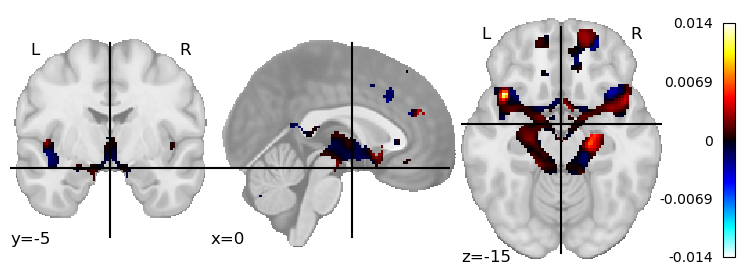

In [86]:
plot_stat_map(sub1_masked)

In [ ]:
sub1_masked

     ======== data type ======== 
 <class 'numpy.ndarray'>
      ======== Maximum ========
Overall Maximum: 0.01


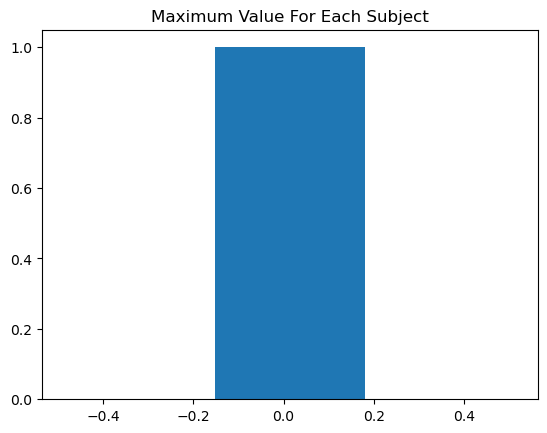

      ======== Mean ========
Overall Mean: 0.00


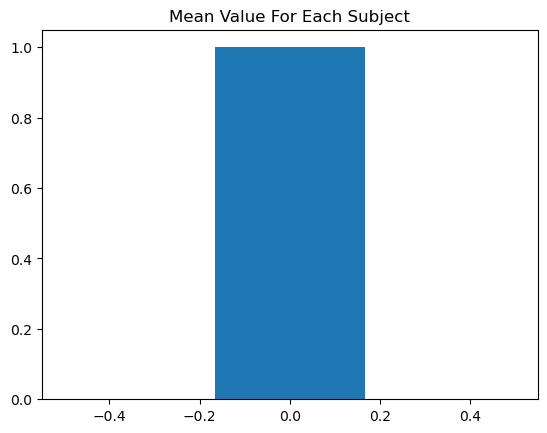

      ======== Minimum ========
Overall Minimum: -0.01


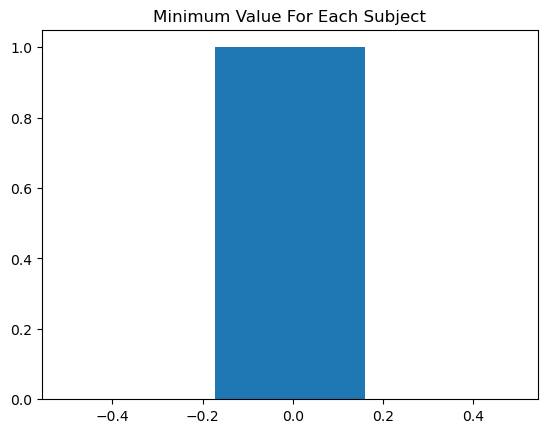

In [82]:
helper.image_report(sub1_masked)

In [124]:
n = 30
i = 0
data = Original_DBMs.get_fdata()
n_subjects = Original_DBMs.shape[3]
means_after_mask = np.zeros((n,n_subjects), dtype='<f8')

In [125]:
mask_d = threshold_img(img=index_img(ICs_whole_original,0), threshold="80%").get_fdata()
mask_d_repeat = np.reshape(
    np.repeat(mask_d, Original_DBMs.shape[3], axis=2),
    Original_DBMs.shape,
    )
masked_data = np.multiply(data, mask_d_repeat) 

for j in range(n_subjects):
    subject = masked_data[...,j]
    index = np.nonzero(subject)
    means_after_mask[i,j] = np.nanmean(subject[index])


In [ ]:
# from nilearn.masking import apply_mask
# d = apply_mask(imgs=Original_DBMs, mask_img=index_img(ICs_whole_original,0))

In [7]:
# helper.image_report(ICs_whole_original)

In [8]:
# WIDTH_SIZE = 6
# HEIGHT_SIZE = 4
# for i in range(ICs_data.shape[3]):
#     plt.title(f"IC {i} data distribution")
#     plt.xlim([-0.01,0.01])
#     sns.histplot(
#         data=np.ravel(ICs_data[...,i]),
#         bins=10,
#         color=sns.color_palette('Set2')[2],
#         )
#     plt.show()

In [10]:
List_of_masks = []
path = pathlib.Path("/data/origami/niusha/code/local-experiment/io/whole_original_data/PD/masks/")
for i in range(30):
    List_of_masks.append(load_img(path / f"IC_PD_{i}.nii.gz"))

masks = concat_imgs(List_of_masks)

/data/origami/niusha/miniconda3/lib/python3.9/site-packages/nilearn/plotting/displays/_slicers.py:144: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure = plt.figure(figure, figsize=figsize,


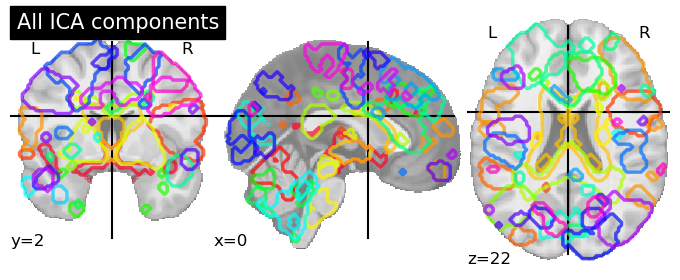

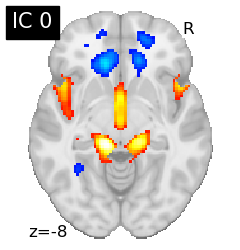

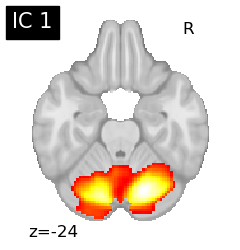

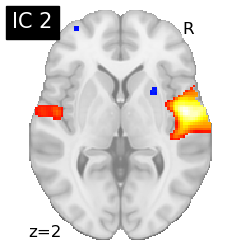

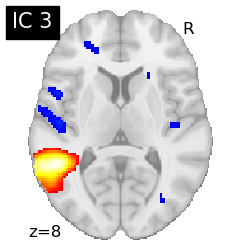

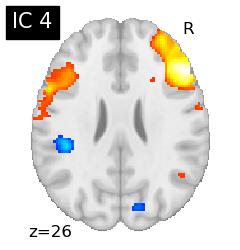

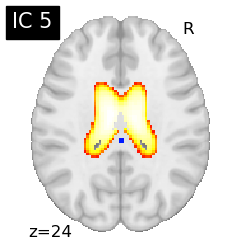

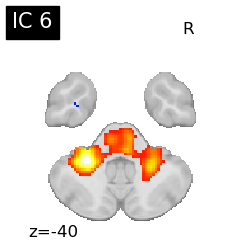

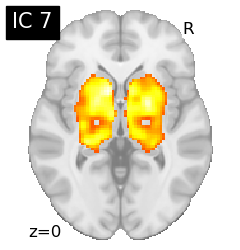

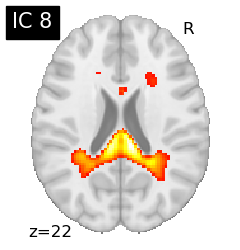

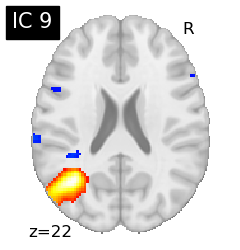

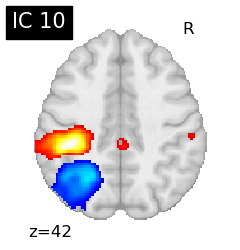

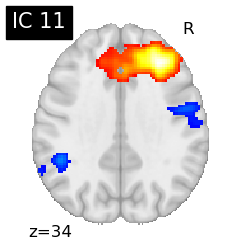

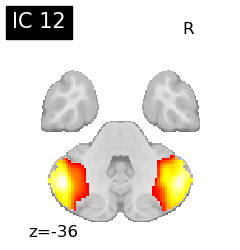

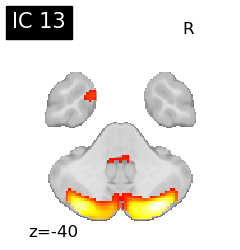

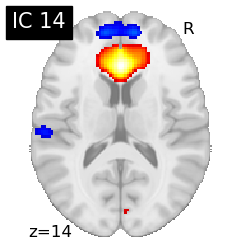

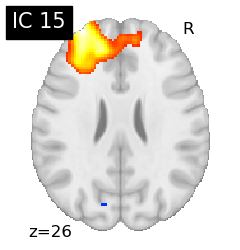

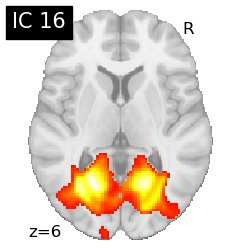

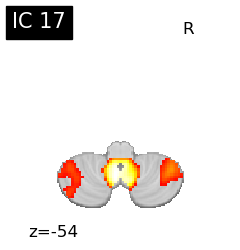

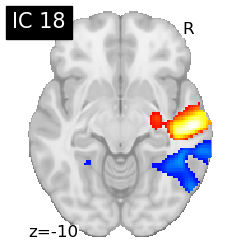

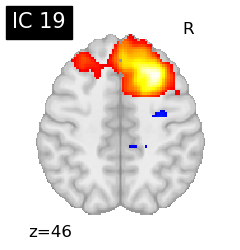

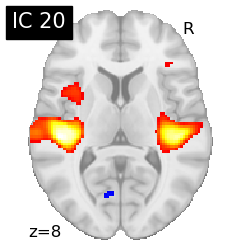

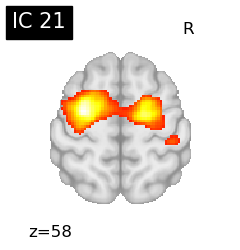

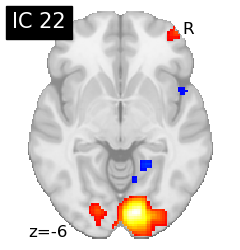

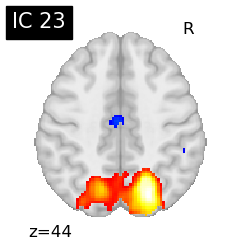

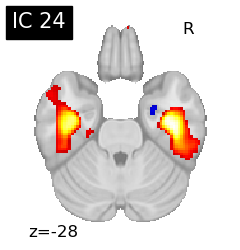

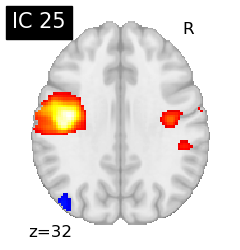

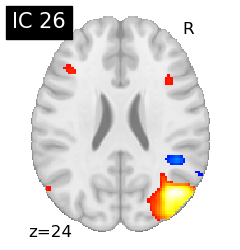

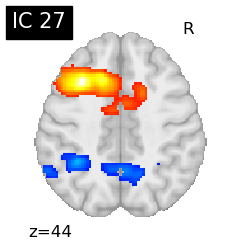

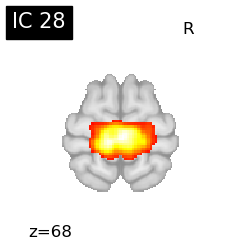

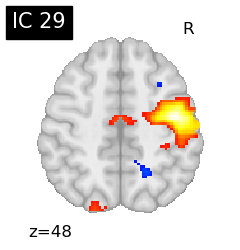

In [11]:
ica_module.plot_ICA_components(masks)

In [ ]:
# from nilearn import masking
# from nilearn.image import iter_img
# from nilearn.masking import apply_mask
# from nilearn.image import binarize_img

# new_masks_list = []
# for i, cur_ic in enumerate(iter_img(ICs_whole_original)):
#     plot_stat_map(cur_ic, display_mode="z", title="IC %d" %i,
#         cut_coords=1, colorbar=False)

#     mask = masking.compute_brain_mask(
#         target_img=cur_ic,
#         mask_type='whole-brain',
#         )
#     plot_stat_map(mask, display_mode="z", title="IC mask %d" %i,
#         cut_coords=1, colorbar=False)  

#     new_masks_list.append(mask)    

In [7]:
# new_masks = concat_imgs(new_masks_list)

In [12]:
# ica_module.plot_ICA_components(new_masks_list)